### Plotting our results in a more convenient way 

In [76]:
# Import useful libraries for computation
import numpy as np

# Import torch and libraries to deal with NN
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from pyhessian import hessian 
import copy
import pickle

# Import usefil library to visualize results
import matplotlib.pyplot as plt

# Importing the LeNet5 architecture we are going to use for our study and comparisons
from cnn_architectures import *

# Importing parameters to use with different optimizers before comparing them
import params

# Importing useful functions
from helpers import *

# Ignoring warnings to make the code more readable
import warnings
warnings.filterwarnings("ignore")

# Useful libraries to create directories
from os import makedirs
from shutil import rmtree

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [77]:
#load adagrad data
adagrad_grad_norms = np.loadtxt('./checkpoints/adagrad_grad_norms')
adagrad_spectral_gap = np.loadtxt('./checkpoints/adagrad_spectral_gap')
adagrad_loss_list = np.loadtxt('./checkpoints/adagrad_loss_list')


#load adam data
adam_grad_norms = np.loadtxt('./checkpoints/adam_grad_norms')
adam_spectral_gap = np.loadtxt('./checkpoints/adam_spectral_gap')
adam_loss_list = np.loadtxt('./checkpoints/adam_loss_list')

#load sgd data
sgd_grad_norms = np.loadtxt('./checkpoints/sgd_grad_norms')
sgd_spectral_gap = np.loadtxt('./checkpoints/sgd_spectral_gap')
sgd_loss_list = np.loadtxt('./checkpoints/sgd_loss_list')

#load adahessian data
adahessian_grad_norms = np.loadtxt('./checkpoints/adahessian_grad_norms')
adahessian_spectral_gap = np.loadtxt('./checkpoints/adahessian_spectral_gap')
adahessian_loss_list = np.loadtxt('./checkpoints/adahessian_loss_list')

Let's now plot the gradient norms for each optimizer :

In [78]:
def grad_norm_plot(ax, x_data, y_data, title):
    ax.set_title(title, fontsize=12)
    ax.plot(x_data,y_data)
    #ax.set_xlabel('# Steps', fontsize=15)
    #ax.set_ylabel('Gradient norm', fontsize=15)
    #ax.legend(loc='upper right', fontsize="10")
    

Text(0.08, 0.5, 'Gradient norm [-]')

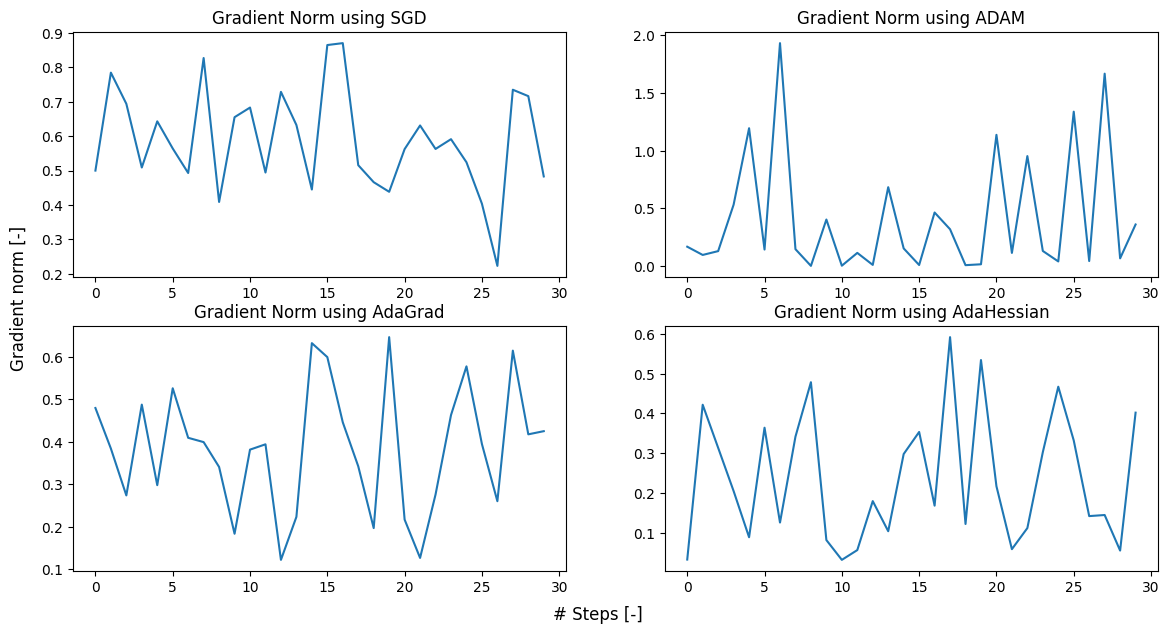

In [79]:
fig, ax = plt.subplots(2,2,figsize=(14,7))

grad_norm_plot(ax[0,0], range(len(sgd_grad_norms[-30:])), sgd_grad_norms[-30:], 'Gradient Norm using SGD')
grad_norm_plot(ax[0,1], range(len(adam_grad_norms[-30:])), adam_grad_norms[-30:], 'Gradient Norm using ADAM')
grad_norm_plot(ax[1,0], range(len(adagrad_grad_norms[-30:])), adagrad_grad_norms[-30:], 'Gradient Norm using AdaGrad')
grad_norm_plot(ax[1,1], range(len(adahessian_grad_norms[-30:])), adahessian_grad_norms[-30:], 'Gradient Norm using AdaHessian')

fig.text(0.5, 0.04, '# Steps [-]', ha='center', fontsize="12")
fig.text(0.08, 0.5, 'Gradient norm [-]', va='center', rotation='vertical', fontsize="12")

Next, we plot the spectral gap for each optimizer :

Text(0.08, 0.5, 'Spectral gap [-]')

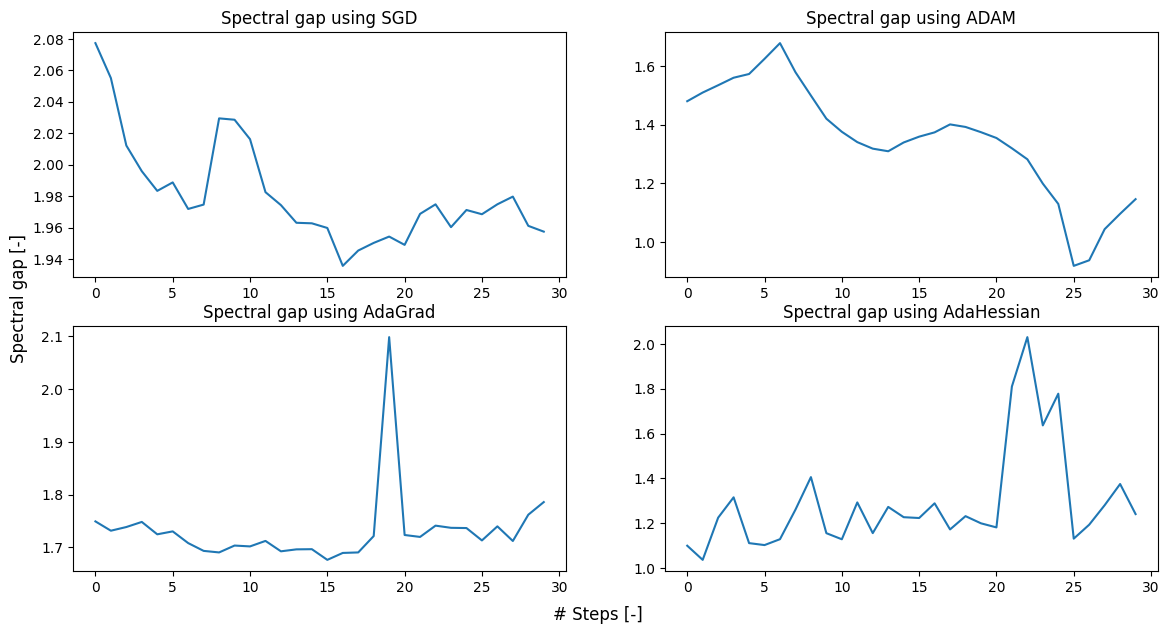

In [80]:
fig, ax = plt.subplots(2,2,figsize=(14,7))

grad_norm_plot(ax[0,0], range(len(sgd_spectral_gap)), sgd_spectral_gap, 'Spectral gap using SGD')
grad_norm_plot(ax[0,1], range(len(adam_spectral_gap)), adam_spectral_gap, 'Spectral gap using ADAM')
grad_norm_plot(ax[1,0], range(len(adagrad_spectral_gap)), adagrad_spectral_gap, 'Spectral gap using AdaGrad')
grad_norm_plot(ax[1,1], range(len(adahessian_spectral_gap)), adahessian_spectral_gap, 'Spectral gap using AdaHessian')

fig.text(0.5, 0.04, '# Steps [-]', ha='center', fontsize="12")
fig.text(0.08, 0.5, 'Spectral gap [-]', va='center', rotation='vertical', fontsize="12")

Finally, we plot the perturbed loss landscape for each optimizer :

Text(0.08, 0.5, 'Loss [-]')

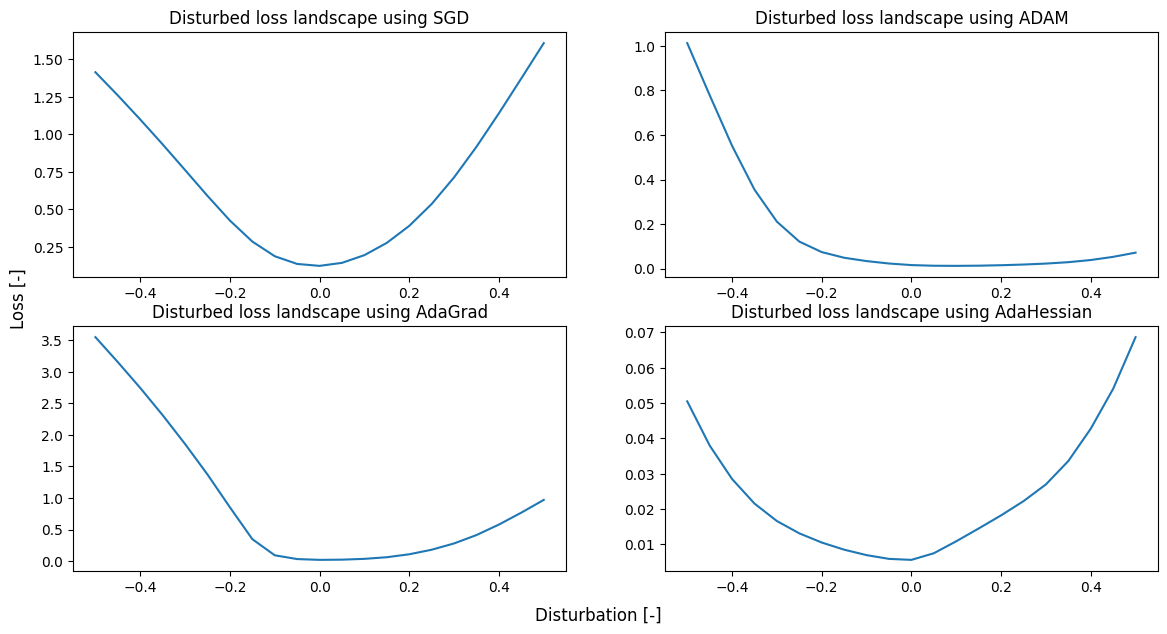

In [81]:
lams = np.linspace(-0.5, 0.5, 21).astype(np.float32)

fig, ax = plt.subplots(2,2,figsize=(14,7))

grad_norm_plot(ax[0,0], lams, sgd_loss_list, 'Disturbed loss landscape using SGD')
grad_norm_plot(ax[0,1], lams, adam_loss_list, 'Disturbed loss landscape using ADAM')
grad_norm_plot(ax[1,0], lams, adagrad_loss_list, 'Disturbed loss landscape using AdaGrad')
grad_norm_plot(ax[1,1], lams, adahessian_loss_list, 'Disturbed loss landscape using AdaHessian')

fig.text(0.5, 0.04, 'Disturbation [-]', ha='center', fontsize="12")
fig.text(0.08, 0.5, 'Loss [-]', va='center', rotation='vertical', fontsize="12")
